In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sample = pd.read_csv('/Users/angelicaliang/Downloads/nlp-getting-started/sample_submission.csv')
test = pd.read_csv('/Users/angelicaliang/Downloads/nlp-getting-started/test.csv')
train = pd.read_csv('/Users/angelicaliang/Downloads/nlp-getting-started/train.csv')

In [3]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


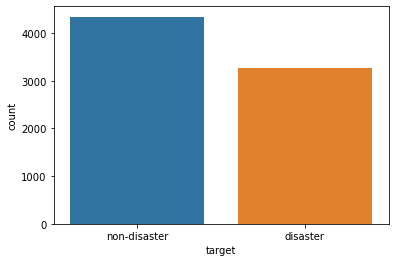

In [16]:
#train-target analysis
tgt = train.groupby('target').count()
plt.hist(train['target'],3)
ax = sns.countplot(x = 'target',data = train)
ax.set(xticklabels =['non-disaster','disaster'])
plt.show()
#null values appeared more frequently than valid values

Count
keyword               target       
ablaze                0          23
                      1          13
accident              0          11
                      1          24
aftershock            0          34
airplane%20accident   0           5
                      1          30
ambulance             0          18
                      1          20
annihilated           0          23
                      1          11
annihilation          0          19
                      1          10
apocalypse            0          23
                      1           9
armageddon            0          37
                      1           5
army                  0          29
                      1           5
arson                 0          10
                      1          22
arsonist              0          26
                      1           8
attack                0          11
                      1          25
attacked              0          14
                      1          21
avalanche             0          26
                      1           4
battle                0          21
                      1           5
bioterror             0          15
                      1          22
bioterrorism          0           9
                      1          21
blaze                 0          33
                      1           5
blazing               0          33
                      1           1
bleeding              0          30
                      1           5
blew%20up             0          31
                      1           2
blight                0          30
                      1           2
blizzard              0          33
                      1           4
blood                 0          30
                      1           5
bloody                0          32
                      1           3
blown%20up            0          28
                      1           5
body%20bag            0          32
                      1           1
body%20bagging        0          28
                      1           5
body%20bags           0          40
                      1           1
bomb                  0          19
                      1          15
bombed                0          19
                      1          19
bombing               0           2
                      1          27
bridge%20collapse     0           6
                      1          29
buildings%20burning   0          11
                      1          24
buildings%20on%20fire 0           5
                      1          28
burned                0          26
                      1           7
burning               0          24
                      1          10
burning%20buildings   0          16
                      1          21
bush%20fires          0           7
                      1          18
casualties            0           7
                      1          28
casualty              0          19
                      1          15
catastrophe           0          29
                      1           7
catastrophic          0          10
                      1          20
chemical%20emergency  0          18
                      1          15
cliff%20fall          0          28
                      1           8
collapse              0          19
                      1          15
collapsed             0          22
                      1          13
collide               0          31
                      1           3
collided              0          17
                      1          23
collision             0          10
                      1          29
crash                 0          21
                      1          12
crashed               0          13
                      1          21
crush                 0          33
                      1           4
crushed               0          27
                      1           4
curfew                0          3

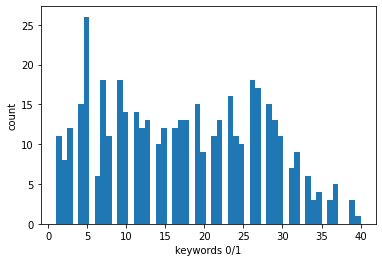

In [111]:
tn = train.copy()
tn1 = tn.drop(['id','location','text'], axis = 1)
tn2 = tn1.groupby(['keyword','target'])
kw = tn2.value_counts()
df = pd.DataFrame(kw, columns=['Count'])
plt.xlabel('keywords 0/1')
plt.ylabel('count')
plt.hist(kw,55)
pd.set_option('display.max_rows', None)
df

In [112]:
locv = train['location'].value_counts(dropna = True).rename_axis('Area').reset_index(name='counts')
pd.set_option('display.max_rows', None)
locv

,Area,counts
0,USA,104
1,New York,71
2,United States,50
3,London,45
4,Canada,29
5,Nigeria,28
6,UK,27
7,"Los Angeles, CA",26
8,India,24
9,Mumbai,22
